Na podstwie ostatnich 5 przewidzieć kolejną jedna -- wejsscie to deltta t i zmiana kursu



Dane zrobic w fromie 5 danych i wynik , potemm je poshuflowac
wyrzucic zmiany dluzsze niz dzien
mozna zsporbowac dane gdzie nic sie nie zmienilo tez wyrzucic 

# TO DO:

1. zmienic close na cours change w prepare_day DONE
2. zamineic df na numpy array DONE
3. przetestowac wyjatek w prepare_day
4. podzielic miesiace na grupy 6,1,3,1 DONE
4. przetestowac inne modele, w liniowym sprobowac zrobic binaryny output

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_test_path='../data/df_test'
df_train_path='../data/df_train'

# Prediction

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm
import numpy as np

## Load data

In [4]:
df_test=pd.read_pickle(df_test_path)
df_train=pd.read_pickle(df_train_path)

In [5]:
seed=42

In [6]:
def df_to_array(df,shuffle=True,seed=seed):
    '''
    Takes dateframe and returns numpy arrays X,y
    '''
    if shuffle:
        df = df.sample(random_state=seed,frac=1).reset_index(drop=True)
    X = np.array(df[[x for x in df.columns if 'Time' in x or 'Cours' in x]])
    y =  np.array(df.y)
    return X, y

In [7]:
X_test,Y_test=df_to_array(df_test)
X_train,Y_train=df_to_array(df_train)

In [8]:
X_test.shape

(748850, 10)

In [9]:
X_train.shape

(1435805, 10)

In [10]:
Y_train.shape

(1435805,)

In [11]:
Y_test.shape

(748850,)

## Add normalization

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_test)
rescaledX_test= scaler.transform(X_test)
rescaledX_train=scaler.transform(X_train)
# summarize transformed data
np.set_printoptions(precision=3)

In [13]:
X_train=rescaledX_train
X_test=rescaledX_test

In [14]:
# Training
clf = LinearRegression()
clf.fit(X_train,Y_train)
# Testing
confidence = clf.score(X_test, Y_test)
print("confidence: ", confidence)

confidence:  0.16539697230382944


In [15]:
forecast_prediction = clf.predict(X_test[:10])
print(forecast_prediction,'\n',Y_test[:10])

[-0.074 -0.069  0.1   -0.027 -0.047 -0.051  0.063 -0.042  0.106  0.021] 
 [-0.15  0.05  0.2  -0.1  -0.1  -0.1   0.13 -0.1   0.1   0.1 ]


In [16]:
a=X_test[:-5]
print(a)
print(Y_test[:-5])

[[ 1.257 -0.404  0.415 ... -0.197  0.413  0.043]
 [ 1.257 -0.384 -0.426 ... -0.377 -0.842  0.906]
 [-1.69   0.111  4.198 ... -0.057 -1.678 -0.057]
 ...
 [ 0.415 -0.325 -0.426 ... -0.347 -0.424 -0.087]
 [ 0.415 -0.335 -0.426 ... -0.237 -1.26  -0.258]
 [ 0.163  1.131 -0.51  ... -0.357  0.162 -0.408]]
[-0.15  0.05  0.2  ... -0.05 -0.1   0.02]


In [17]:
clf.predict(a)

array([-0.074, -0.069,  0.1  , ..., -0.023, -0.019, -0.009])

# More models

In [18]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

/home/filip/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Test options and eveluation metric

In [19]:
num_folds=3
scoring='neg_mean_squared_error'


# Spot-check algorithms

In [20]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
# models.append(('KNN',KNeighborsRegressor()))#rowninez dlugo sie wykonuje
models.append(('CART',DecisionTreeRegressor()))
# models.append(('SVR',SVR())) #bardzo dlugo trwa jego obliczanie 

# Evaluate models

## Start with smaller sets

In [21]:
X_train=X_train[:1000000]
Y_train=Y_train[:1000000]

'LR': -0.013607 (0.000050)
'LASSO': -0.017868 (0.000076)
'EN': -0.017868 (0.000076)
'KNN': -0.015810 (0.000045)
'CART': -0.028155 (0.000173)


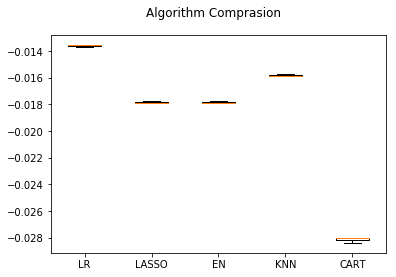

In [22]:
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

fig=plt.figure()
fig.suptitle('Algorithm Comprasion')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Standardize the data

In [23]:
piplines=[]
piplines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
piplines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
piplines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
# piplines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
piplines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
# piplines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))

results=[]
names=[]
for name, model in piplines:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

'ScaledLR': -0.013607 (0.000050)
'ScaledLASSO': -0.017868 (0.000076)
'ScaledEN': -0.017868 (0.000076)
'ScaledCART': -0.028173 (0.000149)


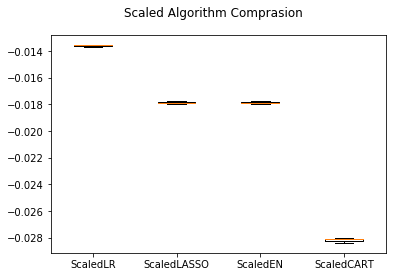

In [24]:
fig=plt.figure()
fig.suptitle('Scaled Algorithm Comprasion')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Ensemble Methods

In [45]:
ensembles=[]
ensembles.append(('ScaledAB',Pipeline([('Scaler', StandardScaler()),('Ab',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM',Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET',Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))

In [46]:
results=[]
names=[]
for name, model in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

'ScaledAB': -0.010893 (0.001253)
'ScaledGBM': -0.007274 (0.000053)
'ScaledRF': -0.008449 (0.000042)
'ScaledET': -0.008697 (0.000056)


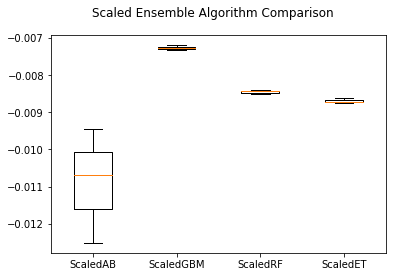

In [47]:
fig=plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Tune GBM

In [ ]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
param_grid=dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model=GradientBoostingRegressor(random_state=seed)
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [ ]:
print("Best %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with %r" %(mean,stdev,param))

# XGBoost

In [26]:
import xgboost as xgb 

In [21]:
ensembles=[]
ensembles.append(('ScaledXGB',Pipeline([('Scaler', StandardScaler()),('XGB',xgb.XGBRegressor())])))

In [22]:
results=[]
names=[]
for name, model in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

'ScaledXGB': -0.007276 (0.000054)


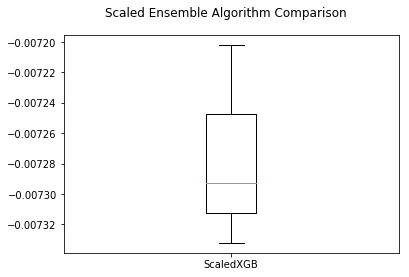

In [23]:
fig=plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# XGBoost

In [36]:
scaler = StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)
# model= LinearRegression()
model=xgb.XGBRegressor()
model.fit(rescaledX,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(Y_test,predictions))

0.011825116900305781


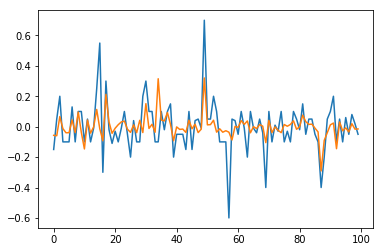

In [38]:
plt.plot(Y_test[:100])
plt.plot(predictions[:100])
plt.show()

In [39]:
FP=[1 if Y_test[x]>0 and predictions[x]>0 else 0 for x in range(len(Y_test)) ]
FN=[1 if Y_test[x]<0 and predictions[x]<0 else 0 for x in range(len(Y_test)) ]

In [40]:
(sum(FP)+sum(FN))/len(Y_test)

0.6388649262202043

Algorytm w 30 (0.30372523107167654 dla danych zawierajacych zera) procentach dobrze przewiduje, czy akcje wzrosną czy spadną

# Linear model

In [41]:
scaler = StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)
model= LinearRegression()
# model=xgb.XGBRegressor()
model.fit(rescaledX,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(Y_test,predictions))

0.012017753509180525


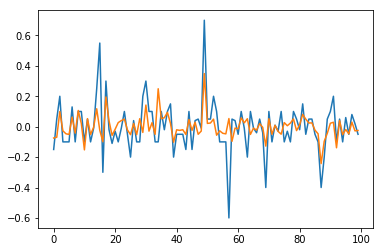

In [43]:
plt.plot(Y_test[:100])
plt.plot(predictions[:100])
plt.show()

In [44]:
FP=[1 if Y_test[x]>0 and predictions[x]>0 else 0 for x in range(len(Y_test)) ]
FN=[1 if Y_test[x]<0 and predictions[x]<0 else 0 for x in range(len(Y_test)) ]

In [45]:
(sum(FP)+sum(FN))/len(Y_test)

0.6341643853909328

In [56]:
model = xgb.XGBRegressor(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [58]:
eval_set = [(X_train, Y_train), (X_test, Y_test)]
model.fit(X_train, Y_train, eval_set=eval_set, verbose=True)

[21:53:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[0]	validation_0-rmse:0.503284	validation_1-rmse:0.501779
[21:53:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[1]	validation_0-rmse:0.498421	validation_1-rmse:0.496902
[21:53:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=4
[2]	validation_0-rmse:0.493586	validation_1-rmse:0.492062
[21:53:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[3]	validation_0-rmse:0.488823	validation_1-rmse:0.487285
[21:53:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[4]	validation_0-rmse:0.484087	validation_1-rmse:0.482543
[21:53:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 1

[45]	validation_0-rmse:0.327489	validation_1-rmse:0.32541
[21:55:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 20 pruned nodes, max_depth=0
[46]	validation_0-rmse:0.324466	validation_1-rmse:0.322368
[21:55:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[47]	validation_0-rmse:0.321474	validation_1-rmse:0.319357
[21:55:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[48]	validation_0-rmse:0.31849	validation_1-rmse:0.316363
[21:55:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[49]	validation_0-rmse:0.315563	validation_1-rmse:0.313417
[21:55:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[50]	validation_0-rmse:0.312667	validation_1-rmse:0.310502
[21:55:47] /workspace/src/tree/up

[21:57:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[91]	validation_0-rmse:0.217509	validation_1-rmse:0.21454
[21:57:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[92]	validation_0-rmse:0.215704	validation_1-rmse:0.21271
[21:57:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[93]	validation_0-rmse:0.21392	validation_1-rmse:0.210902
[21:57:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=4
[94]	validation_0-rmse:0.212127	validation_1-rmse:0.209093
[21:57:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[95]	validation_0-rmse:0.210385	validation_1-rmse:0.207326
[21:57:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra node

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=10, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=0.8)

In [59]:
results = model.evals_result()
print(results)

{'validation_0': {'rmse': [0.503284, 0.498421, 0.493586, 0.488823, 0.484087, 0.479423, 0.474806, 0.470238, 0.465693, 0.461218, 0.456767, 0.452385, 0.448025, 0.443733, 0.439464, 0.435239, 0.43108, 0.426964, 0.422891, 0.418861, 0.41485, 0.410881, 0.406975, 0.403112, 0.399265, 0.395459, 0.391715, 0.388011, 0.384346, 0.38072, 0.377131, 0.373581, 0.370044, 0.366569, 0.363106, 0.359679, 0.356313, 0.352959, 0.349664, 0.34638, 0.343154, 0.339964, 0.336807, 0.333659, 0.330546, 0.327489, 0.324466, 0.321474, 0.31849, 0.315563, 0.312667, 0.309803, 0.306969, 0.304167, 0.301369, 0.298627, 0.29589, 0.293182, 0.290528, 0.287904, 0.285308, 0.282741, 0.280176, 0.277665, 0.275181, 0.272699, 0.270271, 0.267869, 0.265493, 0.263118, 0.260768, 0.258445, 0.256174, 0.253928, 0.251707, 0.249511, 0.24734, 0.245167, 0.243044, 0.240946, 0.238871, 0.236821, 0.234794, 0.23279, 0.230809, 0.22885, 0.226915, 0.224973, 0.223081, 0.221212, 0.219364, 0.217509, 0.215704, 0.21392, 0.212127, 0.210385, 0.208662, 0.20693, 0.20

In [61]:
results['validation_0']

{'rmse': [0.503284,
  0.498421,
  0.493586,
  0.488823,
  0.484087,
  0.479423,
  0.474806,
  0.470238,
  0.465693,
  0.461218,
  0.456767,
  0.452385,
  0.448025,
  0.443733,
  0.439464,
  0.435239,
  0.43108,
  0.426964,
  0.422891,
  0.418861,
  0.41485,
  0.410881,
  0.406975,
  0.403112,
  0.399265,
  0.395459,
  0.391715,
  0.388011,
  0.384346,
  0.38072,
  0.377131,
  0.373581,
  0.370044,
  0.366569,
  0.363106,
  0.359679,
  0.356313,
  0.352959,
  0.349664,
  0.34638,
  0.343154,
  0.339964,
  0.336807,
  0.333659,
  0.330546,
  0.327489,
  0.324466,
  0.321474,
  0.31849,
  0.315563,
  0.312667,
  0.309803,
  0.306969,
  0.304167,
  0.301369,
  0.298627,
  0.29589,
  0.293182,
  0.290528,
  0.287904,
  0.285308,
  0.282741,
  0.280176,
  0.277665,
  0.275181,
  0.272699,
  0.270271,
  0.267869,
  0.265493,
  0.263118,
  0.260768,
  0.258445,
  0.256174,
  0.253928,
  0.251707,
  0.249511,
  0.24734,
  0.245167,
  0.243044,
  0.240946,
  0.238871,
  0.236821,
  0.234794,
  0

In [62]:
eval_set = [(X_train, Y_train), (X_test, Y_test)]
model.fit(X_train, Y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracY_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

[22:10:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[0]	validation_0-error:0.000261	validation_0-logloss:0.683207	validation_1-error:0.000347	validation_1-logloss:0.683209
[22:10:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[1]	validation_0-error:0.000261	validation_0-logloss:0.673463	validation_1-error:0.000347	validation_1-logloss:0.673466
[22:10:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=4
[2]	validation_0-error:0.000261	validation_0-logloss:0.663864	validation_1-error:0.000347	validation_1-logloss:0.663887
[22:10:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[3]	validation_0-error:0.000261	validation_0-logloss:0.654495	validation_1-error:0.000347	validation_1-logloss:0.654519
[22:10:56] /workspace/src/tr

[22:12:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[34]	validation_0-error:0.000261	validation_0-logloss:0.43313	validation_1-error:0.000347	validation_1-logloss:0.433401
[22:12:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[35]	validation_0-error:0.000261	validation_0-logloss:0.427682	validation_1-error:0.000347	validation_1-logloss:0.42797
[22:12:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[36]	validation_0-error:0.000261	validation_0-logloss:0.422357	validation_1-error:0.000347	validation_1-logloss:0.422648
[22:12:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[37]	validation_0-error:0.000261	validation_0-logloss:0.417073	validation_1-error:0.000347	validation_1-logloss:0.417378
[22:12:20] /workspace/src/

[22:13:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[68]	validation_0-error:0.000261	validation_0-logloss:0.28679	validation_1-error:0.000347	validation_1-logloss:0.287324
[22:13:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=4
[69]	validation_0-error:0.000261	validation_0-logloss:0.283414	validation_1-error:0.000347	validation_1-logloss:0.283965
[22:13:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=4
[70]	validation_0-error:0.000261	validation_0-logloss:0.280082	validation_1-error:0.000347	validation_1-logloss:0.280654
[22:13:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[71]	validation_0-error:0.000261	validation_0-logloss:0.276793	validation_1-error:0.000347	validation_1-logloss:0.277386
[22:13:43] /workspace/src

NameError: name 'accuracY_score' is not defined